<a href="https://colab.research.google.com/github/jlosar/Julio-Losa-ML-projeto/blob/main/MVP_Machine_Learning_%26_Analytics_Julio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Machine Learning & Analytics


*   Julio Cesar Losa Rodrigues
*   Matricula: 4052025001006
*   Dataset utilizado: Rossmann Store Sales (Kaggle)


# 1. Introdução:



*   **Objetivo:**

Fazer previsão de vendas futuras por loja e produto utilizando técnicas de Machine Learning.

*   **Descrição do problema**

Para qualquer gestor em uma empresa que trabalha com varejo fazer uma boa previsão do volume de vendas é condição fundamental para o planejamento do ano em relação a previsão de receita, Logística e investimento (verba para promoções, Mão de obra e etc.). Esse trabalho tem por objetivo tornar a previsão de vendas mais precisa, confiável e a força de vendas mais eficiênte.

*   **Descrição do Dataset:**

O dataset Rossmann Store Sales foi disponibilizado pelo Kaggle em uma competição de previsão de vendas. Ele contém informações de vendas diárias de 1.115 lojas da rede de farmácias Rossmann na Europa, durante o período de janeiro/2013 a julho/2015 (~2 anos e 7 meses).

*   **Desafios do Dataset:**

      1.   Alta variabilidade: vendas variam por loja, tipo, promoções e sazonalidade.
      2.   Dados faltantes: algumas lojas não possuem histórico completo de concorrência e promoções.
      3.   Fatores externos: datas especiais, feriados e promoções impactam fortemente as vendas.
      4.   Séries temporais múltiplas: mais de mil lojas diferentes, cada uma com comportamento próprio.

*   **Boas práticas que serão utilizadas:**


    1. Documentação e comentários
    2. Tratamento de dados faltantes: mediana, valores default, substituição.
    3. Engenharia de variáveis: criação de CompetitionAgeInMonths, Promo2AgeInMonths e Sales_log.
    4. Controle de seed (SEED)
    5. Validação temporal (TimeSeriesSplit): fundamental para séries temporais, evitando vazamento de dados.
    6. Baseline (DummyRegressor)
    7. Comparação de diferentes famílias de modelos (Ridge, Lasso, RF, XGB)
    8. Visualizações finais (R², RMSE, MAE)





# 2. Carga, Preparação e Limpeza dos dados:

(treino, validação, teste; validação cruzada; sempre evitando vazamento de dados)

## Configurações iniciais, clonagem do repositório e carregamento dos dados

Inicialmente essa parte foi a mais dificultosa, pois estava baixando o dataset diretamente do kaggle sempre que iria rodar o arquivo. Bem instruído, consegui aprender a baixar para o Github.

O Arquivo "Train.csv", pelo seu tamanho, dá uma complexidade maior em baixá-lo para o diretório do Github, pois eu tenho que utilizar Git LFS e tem vezes que esse caminho executa sem nenhum problema, outras ele demonstra erro.

In [1]:
# ==============================================================================================================
# Imports necessários
# ==============================================================================================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd # Responsável por carregar dados, limpar, transformar e estruturar tabelas de dados
import numpy as np # Essencial para computação numérica em python
import matplotlib.pyplot as plt # Oferece uma interface similar ao MATLAB para gerar gráficos e diagramas.
import seaborn as sns # Oferece uma interface de alto nível para a criação de gráficos estatísticos.
import time  # É usado para trabalhar com tempo, por exemplo, para medir o tempo de execução de um bloco de código

from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold, KFold, RandomizedSearchCV, GridSearchCV # Ferramentas para dividir e validar os dados, o que é crucial para treinar e testar modelos
from sklearn.compose import ColumnTransformer # Permite aplicar diferentes transformações a diferentes colunas de um conjunto de dados.
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Este módulo tem ferramentas para transformar os dados e prepará-los para o modelo.
from sklearn.pipeline import Pipeline # Cria um pipeline que encadeia múltiplas etapas de processamento e modelagem em um único objeto.
from sklearn.dummy import DummyClassifier, DummyRegressor # Modelos "de base" que não aprendem nada. Eles são usados para estabelecer um baseline, um ponto de partida para comparar o desempenho dos modelos reais.
from sklearn.linear_model import LogisticRegression, Ridge, Lasso # Este módulo contém modelos de regressão e classificação lineares.
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Módulo para modelos que combinam múltiplos estimadores.
from sklearn.cluster import KMeans # Modelo para problemas de agrupamento (clustering).
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score) # Este módulo contém todas as métricas para avaliar o desempenho dos modelos.
from scipy.stats import randint, uniform # Esta linha importa funções do módulo stats da biblioteca SciPy. SciPy é uma biblioteca de computação científica em Python que é frequentemente usada com NumPy e Pandas para tarefas complexas.
from IPython.display import display # É uma função que permite exibir objetos de forma rica e formatada.
from xgboost import XGBRegressor # Esta linha importa o modelo XGBRegressor da biblioteca XGBoost.
from tabulate import tabulate # É uma biblioteca para formatar dados tabulares.

# Configurações pandas
pd.set_option('display.width', None) # Essa linha define a largura máxima da tela de exibição para None. Isso instrui o Pandas a usar a largura total disponível, garantindo que as tabelas de dados não sejam cortadas ou quebras de linha indesejadas não ocorram.
pd.set_option('display.max_columns', None) # Esta linha remove o limite padrão de colunas que o Pandas exibe. Ao definir None, é garantido que todas as colunas sejam mostradas, facilitando a inspeção.
pd.set_option('display.max_colwidth', None) # Essa opção controla a largura máxima do texto dentro de cada célula. Definindo-a como None, o Pandas não truncará o conteúdo das células, mostrando a string completa, não importa o quão longa ela seja.
pd.set_option('display.float_format', '{:.2f}'.format) # Esta linha define o formato de exibição para todos os números de ponto flutuante (floats) em um DataFrame.


# ==============================================================================================================
# Clonar repositório e carregar dados
# ==============================================================================================================

# Obtendo os dados do repositório e carregando no ambiente Colab
!rm -rf Julio-Losa-ML-projeto

# Esses comandos instalam e inicializam a extensão Git LFS (Large File Storage)
# Foi necessário para lidar com o arquivo "Train.csv"
!apt-get install git-lfs
!git lfs install
!git clone https://github.com/jlosar/Julio-Losa-ML-projeto.git # Baixando os arquivos do meu repositório do GitHub para o ambiente do Google Colab.
%cd Julio-Losa-ML-projeto #muda o diretório de trabalho atual para a pasta recém clonada do meu projeto
!git lfs pull #Baixa os arquivos grandes que foram gerenciados pelo Git LFS, train.csv.
%cd .. #retorna o diretório de trabalho original

#Carregando os arquivos CSV
train = pd.read_csv("Julio-Losa-ML-projeto/Dados/train.csv")
test  = pd.read_csv("Julio-Losa-ML-projeto/Dados/test.csv")
store = pd.read_csv("Julio-Losa-ML-projeto/Dados/store.csv")

# ==============================================================================================================
# Verificação inicial
# ==============================================================================================================
print("Train shape:", train.shape) # Esta linha imprime o número de linhas e colunas do DataFrame train.
print("Test shape:", test.shape) # Esta linha imprime o número de linhas e colunas do DataFrame test.
print("Store shape:", store.shape) # Esta linha imprime o número de linhas e colunas do DataFrame Shape.

# visualizar as cinco primeiras linhas de cada DataFrame.
display(train.head())
display(test.head())
display(store.head())

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Git LFS initialized.
Cloning into 'Julio-Losa-ML-projeto'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 89 (delta 45), reused 5 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 545.40 KiB | 2.67 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Encountered 2 file(s) that should have been pointers, but weren't:
	Dados/store.csv
	Dados/test.csv
[Errno 2] No such file or directory: 'Julio-Losa-ML-projeto #muda o diretório de trabalho atual para a pasta recém clonada do meu projeto'
/content
Not in a git repository.
[Errno 2] No such file or directory: '.. #retorna o diretório de trabalho original'
/content
Train shape: (1017209, 9)
Test shape: (41088, 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.00,1,0,0
1,2,3,4,2015-09-17,1.00,1,0,0
2,3,7,4,2015-09-17,1.00,1,0,0
3,4,8,4,2015-09-17,1.00,1,0,0
4,5,9,4,2015-09-17,1.00,1,0,0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


## Análise da distribuição dos dados

Intuito de entender a distribuição e a qualidade dos dados.

*   Valores discrepantes (outliers)
*   Tendências centrais (média, mediana)
*   Dispersão dos dados (desvio padrão, range)
*   Possíveis problemas de qualidade dos dados
*   Identificação de missing values

O que os dados nos retornou?

**"Count":** Mostra o número de valores não nulos em cada coluna.

1.   Store = 1115: Tenho dado para todas as lojas
2.   CompetitionDistance = 1112: Existem 3 valores ausentes (missing values), tratarei mais a frente no modelo.
1.   CompetitionOpenSinceMonth & CompetitionOpenSinceYear possuem 354 valores ausentes.
2.   Promo2SinceWeek & Promo2SinceYear possuem 544 valores ausentes.

**"Mean:"** A média dos valores em cada coluna.

1.   A média de CompetitionDistance é 5404.90, o que significa que, em média, as lojas têm uma concorrência a uma distância de cerca de 5,4 km.
2.   A média de Promo2 é 0.51, o que indica que cerca de 51% das lojas participam da Promoção 2.

**"Std (standard deviation) = Desvio padrão:"**  mede a dispersão ou a variação dos dados em torno da média.

1.   Um desvio padrão alto, como o de CompetitionDistance (7663.17), sugere que os dados estão muito espalhados. Existem lojas com concorrentes muito próximos e outras com concorrentes muito distantes.

**"Min:"** O valor mínimo de cada coluna.

1.   A menor CompetitionDistance é 20.00 metros.
2.   O menor valor de Promo2 é 0.00, confirmando que algumas lojas não participam.

**"25%, 50% (mediana), 75%:"** São os quartis. Eles dividem os dados em quatro partes iguais e são essenciais para identificar a distribuição e possíveis outliers.

1.   50% (mediana): A mediana de CompetitionDistance é 2325.00. Isso significa que metade das lojas tem um concorrente a uma distância de até 2.325 metros. Note que a mediana é bem menor que a média (5404.90), o que sugere que os dados de CompetitionDistance são assimétricos e provavelmente contêm valores extremos (outliers).

"**Max:**" O valor máximo em cada coluna.

1.   O valor máximo de CompetitionDistance é 75860.00, ou seja, mais de 75 km. Indicativo que mais tarde pode ser identificado como um outlier no modelo




In [2]:
# Informações sobre as vendas, o comportamento dos clientes e a frequência de promoções.

pd.set_option('display.float_format', lambda x: '%.2f' % x) # Comando para configurar o comportamento de exibição do Pandas.
store.describe() # Função para identificar a distribuição dos dados, a presença de outliers ou valores discrepantes.

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


## Tratando Missing Values

É importante tratar missing values em modelos de Machine Learning pois

1.   Algoritmos quebram: Muitos modelos não funcionam com valores missing
2.   Viés nos modelos: Padrões podem ser aprendidos de forma incorreta
1.   Performance reduzida: Previsões menos precisas e confiáveis

Segue a tratativa das colunas necessárias

*   Tratando a coluna "CompetitionDistance"

Irei útilizar a Média para preencher os dados das colunas vazias e com isso evitarei que o modelo superestime o impacto da concorrência para lojas sem dados  

*   Tratando as Colunas de Competição e de Promoção

O objetivo é transformar as colunas de competição e promoção em uma única variável que capture a idade da concorrência e o tempo de promoção.


In [3]:
# ==============================================================================================================
# Identificação de Missing Values
# ==============================================================================================================

store.isnull().sum()
    #".isnull()": É uma função que percorre cada célula do DataFrame e retorna True se a célula estiver vazia (nula) e False se contiver um valor.
    #".sum()": Soma o resultado de ".isnull()". Como Python trata True como 1 e False como 0, o .sum() simplesmente conta quantos valores nulos existem em cada coluna

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [4]:
# ==============================================================================================================
# Tratando a coluna "CompetitionDistance"
# ==============================================================================================================

# 1. Calcular a mediana da coluna
median_distance = store['CompetitionDistance'].median()

# 2. Preencher os valores ausentes com a mediana
store['CompetitionDistance'].fillna(median_distance, inplace=True)

# 3. Verificar o resultado para garantir que não há mais nulos
print(store['CompetitionDistance'].isnull().sum())

# ==============================================================================================================
# Tratando as Colunas de Competição e de Promoção
# ==============================================================================================================

# O código assume que df_store e df_train foram carregados assim:
# store = pd.read_csv('rossmann/store.csv')
# train = pd.read_csv('rossmann/train.csv')

# Preenchendo os valores nulos com valores seguros para cálculo de data.
store['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store['CompetitionOpenSinceYear'].fillna(1900, inplace=True)

# Garante que as colunas sejam do tipo inteiro.
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(int)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(int)

# Preenche valores nulos com 0 ou 'NoPromo', indicando a ausência da promoção 2.
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna('NoPromo', inplace=True)

# Converte as colunas para o tipo inteiro.
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(int)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(int)

# Combina os dataframes de treino e loja em um único dataframe.
# Corrigido: Usando os nomes das suas variáveis
df_merged = pd.merge(train, store, on='Store', how='inner')

# Garante que a coluna de data esteja no formato correto.
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

# Cria a coluna de data de início da concorrência.
df_merged['CompetitionOpenSince'] = pd.to_datetime(
    df_merged['CompetitionOpenSinceYear'].astype(str) + '-' +
    df_merged['CompetitionOpenSinceMonth'].astype(str) + '-01',
    errors='coerce'
)

# Cria a coluna de data de início da Promoção 2.
df_merged['Promo2Start'] = df_merged.apply(
    lambda row: pd.to_datetime(
        f"{row['Promo2SinceYear']}-W{row['Promo2SinceWeek']}-1",
        format='%Y-W%W-%w', errors='coerce'
    ) if row['Promo2SinceYear'] > 0 else pd.NaT, axis=1
)

# Calcula a idade da concorrência em meses.
df_merged['CompetitionAgeInMonths'] = (
    (df_merged['Date'].dt.year - df_merged['CompetitionOpenSince'].dt.year) * 12 +
    (df_merged['Date'].dt.month - df_merged['CompetitionOpenSince'].dt.month)
)

# Calcula a idade da Promoção 2 em meses.
df_merged['Promo2AgeInMonths'] = (
    (df_merged['Date'].dt.year - df_merged['Promo2Start'].dt.year) * 12 +
    (df_merged['Date'].dt.month - df_merged['Promo2Start'].dt.month)
)

# Preenche valores inválidos ou negativos com 0 ou um valor seguro.
df_merged.loc[df_merged['CompetitionAgeInMonths'] < 0, 'CompetitionAgeInMonths'] = 0
df_merged['CompetitionAgeInMonths'].fillna(999, inplace=True)

df_merged.loc[df_merged['Promo2AgeInMonths'] < 0, 'Promo2AgeInMonths'] = 0
df_merged['Promo2AgeInMonths'].fillna(999, inplace=True)

# Remove as colunas originais que não são mais necessárias.
df_merged.drop(
    columns=[
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'CompetitionOpenSince',
        'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2Start'
    ],
    inplace=True
)


0


In [5]:
# Visualizar as primeiras linhas do DataFrame depois do tratamento de missing values

display(df_merged.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,CompetitionAgeInMonths,Promo2AgeInMonths
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0,NoPromo,82,999.00
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,1,"Jan,Apr,Jul,Oct",92,64.00
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.00,1,"Jan,Apr,Jul,Oct",103,51.00
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.00,0,NoPromo,70,999.00
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.00,0,NoPromo,3,999.00


In [6]:
# Refazendo o teste para verificar se restou algum missing values

df_merged.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


## Verificando a Existência de Outliers

Verificar outliers nesse dataset é importante porque valores extremos distorcem a distribuição das variáveis, prejudicam a performance e a interpretação de modelos de machine learning, especialmente os mais sensíveis a escala e variância dos dados.

**Como está o nosso dataset até aqui no que tange outliers?**

Foi feito uma análise de outliers nas colunas Sales e Customers usando o método IQR (Intervalo Interquartil).

**Fazendo uma análise da saída:**

*   Análise de Outliers (Coluna: Sales)

Total de registros: 1.017.209

Outliers encontrados: 26.694 (2.62%)

O método IQR identificou 26.694 vendas que estão fora do intervalo considerado "normal". Isso representa 2,62% do total de registros, uma porcentagem significativa.

Limite inferior: -2.466,50

Limite superior: 14.049,50

Qualquer valor de venda abaixo de -2.466,50 ou acima de 14.049,50 é considerado um outlier. Como vendas não podem ser negativas, o limite inferior indica que todos os valores de vendas são maiores que esse limite.


*   Análise de Outliers (Coluna: Customers)


Total de registros: 1.017.209

Outliers encontrados: 38.095 (3.75%)

O método IQR encontrou 38.095 registros que são considerados outliers na contagem de clientes.

Isso corresponde a 3,75% dos dados.

Limite inferior: -243,00

Limite superior: 1.485,00

Para a contagem de clientes, o método IQR definiu os limites. Qualquer registro com mais de 1.485 clientes será considerado um outlier, assim como valores negativos, que não fazem sentido.

===============================================================================

Representação Gráfica

===============================================================================


*   Boxplot de Vendas (Sales)

Foi utilizado boxplot para visualizar a distribuição dos dados e identificar outliers.

A "Caixa" Central: A caixa azul no centro do gráfico representa os 50% dos dados do meio, entre o primeiro quartil (25%) e o terceiro quartil (75%). A linha escura dentro da caixa é a mediana. O fato de a mediana estar visivelmente mais à esquerda mostra que a maioria das vendas se concentra em valores menores.

Os "Bigodes": As linhas que se estendem para a esquerda e para a direita da caixa são os "bigodes". Eles mostram o intervalo "normal" dos dados, ou seja, onde a maior parte dos registros está.

Os Círculos (Outliers): Os pequenos círculos à direita do bigode superior representam os outliers. O gráfico mostra claramente que existem muitos pontos de dados que são consideravelmente maiores do que a maioria das vendas.

Resumo da leitura do gráfico: O boxplot confirma a presença de outliers de vendas e mostra que a distribuição é assimétrica. A maior parte das vendas tem um valor relativamente baixo, enquanto um pequeno número de vendas é muito alto.

*   Histograma de Clientes (Customers)

Foi utilizado o histograma para visualizar a forma da distribuição de uma variável.

A Forma da Distribuição: O gráfico mostra que a distribuição de clientes tem uma cauda longa e positiva. Isso significa que a maioria dos registros tem um número baixo de clientes (a concentração de dados está no lado esquerdo do gráfico).

Picos (Modas): Há um pico principal em torno de 500-600 clientes, indicando que a contagem de clientes mais comum está nessa faixa.

A "Cauda Longa": A cauda da direita, que se estende por mais de 7.000 clientes, representa os outliers, ou seja, os dias em que houve um número excepcionalmente alto de clientes. O gráfico também confirma que esses eventos são raros.

Resumo da leitura do gráfico: O histograma mostra que a distribuição do número de clientes é altamente assimétrica e concentra-se em valores mais baixos, com uma minoria de registros com um número muito alto de clientes. Essa assimetria justifica sua decisão de tratar outliers e considerar uma transformação logarítmica para essa variável.



In [7]:
# Função para contar outliers em uma coluna pelo método do IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Coluna: {column}")
    print(f" - Total de registros: {df.shape[0]}")
    print(f" - Outliers encontrados: {outliers.shape[0]} ({100*outliers.shape[0]/df.shape[0]:.2f}%)")
    print(f" - Limite inferior: {lower_bound:.2f}, Limite superior: {upper_bound:.2f}")
    print("="*50)
    return outliers

# Verificando em Sales e Customers
outliers_sales = count_outliers_iqr(df_merged, 'Sales')
outliers_customers = count_outliers_iqr(df_merged, 'Customers')

Coluna: Sales
 - Total de registros: 1017209
 - Outliers encontrados: 26694 (2.62%)
 - Limite inferior: -2466.50, Limite superior: 14049.50
Coluna: Customers
 - Total de registros: 1017209
 - Outliers encontrados: 38095 (3.75%)
 - Limite inferior: -243.00, Limite superior: 1485.00


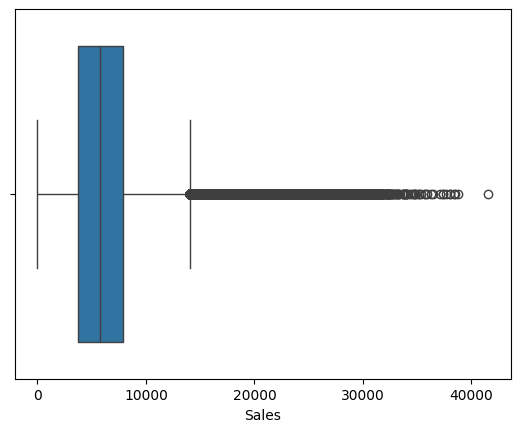

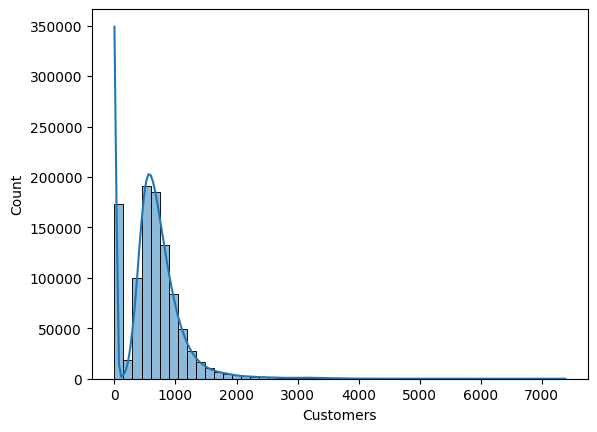

In [8]:
## Observação gráfica de como está se distribuindo os outliers no dataset.

# Boxplot de vendas
sns.boxplot(x=df_merged['Sales'])
plt.show()

# Histograma de clientes
sns.histplot(df_merged['Customers'], bins=50, kde=True)
plt.show()

## Tratando os outliers do dataset

Tratar outliers nesse dataset é importante porque esses valores extremos distorcem a distribuição das variáveis, prejudicam a performance e a interpretação de modelos de machine learning, especialmente os mais sensíveis a escala e variância dos dados.


Optei por tratar os outliers de Sales e Customers utilizando três etapas:

(i) exclusão de registros inconsistentes (Sales = 0 em lojas abertas)

(ii) Winsorization, limitando valores extremos fora do intervalo interquartílico (IQR).
Essa abordagem foi escolhida por equilibrar robustez estatística e preservação da variabilidade natural dos dados.

(iii) Transformação logarítmica (boa para Sales)


Tratar outliers nesse dataset é fundamental porque esses valores extremos distorcem a distribuição das variáveis e prejudicam a performance de modelos, especialmente os lineares (Ridge, Lasso), que são sensíveis à escala e variância dos dado e que nós iremos testar adiante nesse trabalho.

===============================================================================

Interpretação Gráfica depois de tratado:

===============================================================================

O gráfico a seguir objetivo mostrar que o tratamento de outliers foi bem executado com o efeito das três etapas de tratamento proposta: Exclusão de Registros Inconsistentes, da Winsorization e da Transformação Logarítmica (implícita)



*   Boxplot de Vendas (Sales)

Nesse novo gráfico todos os outliers foram eliminados, podemos verificar a aplicação da etapa de Winsorization quando percebemos que no gráfico anterior os valores de vendas ultrapassavam o limite superior e depois do tratamento nós limitamos ao mesmo, ou seja $14.050.

Isso afeta o modelo pois agora ele treinará com uma variável sales onde o valor máximo foi reduzido para um limite estatisticamente mais sensato, evitando que seja distorcido por picos de vendas raro

*   Histograma de Clientes (Customers)

Observando o gráfico, um dos aspectos que mais nos chamam a atenção é a última barra do gráfico a direita, ela representa o limite superior calculado pelo meu IQR (~1485), essa é a evidência da etapa de Winsorization do modelo. Todos os registros que tinham 1500/2000 ou mais clientes, foram limitados e agrupados ao valor máximo.

O modelo agora tem uma variável customer com o seu impacto mitigado. Se observamos ainda temos uma grande assimetria restante e essa é a responsável pela a etapa de transformação logaritma, ela é importante, pois é quem tornará a distribuição mais assimétrica para o treinamento do modelo.

In [9]:
## Tratando os outliers:

# Exclusão de registros inconsistentes: Loja aberta e com venda = 0
df_merged = df_merged[~((df_merged['Open'] == 1) & (df_merged['Sales'] == 0))]

# Winsorization (tirando os outliers): Vamos limitar os valores extremos para que não distorçam o modelo.
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # limite inferior para a identificação de outliers. Valores abaixo desse limite são considerados outliers.
    upper_bound = Q3 + 1.5 * IQR #limite superior. Valores acima desse limite são considerados outliers.

    df[column] = np.where(df[column] < lower_bound, lower_bound, #verifica se o valor atual é menor que o limite inferior. Se for verdade, ele é substituído pelo "lower_bound".
                 np.where(df[column] > upper_bound, upper_bound, df[column])) #verifica se o valor é maior que o limite superior. Se for verdade, ele é substituído pelo "upper_bound".
    return df #Retorna o dataframe modificado, com os valores extremos limitados pelos "lower_bound" e "upper_bound".

df_merged = cap_outliers(df_merged, 'Sales') #Aplicação de Winsorização na coluna 'Sales'.
df_merged = cap_outliers(df_merged, 'Customers') #Aplica a Winsorização à coluna 'Customers'.

# Criando variável transformada
df_merged['Sales_log'] = np.log1p(df_merged['Sales'])


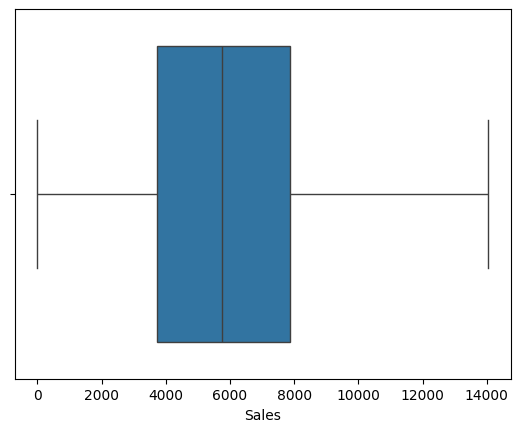

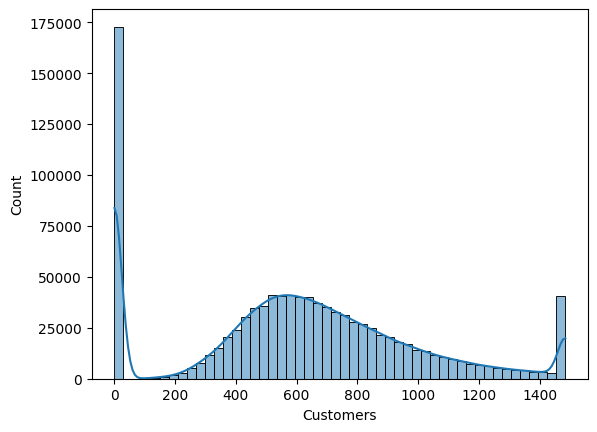

In [10]:
# Boxplot de vendas
sns.boxplot(x=df_merged['Sales'])
plt.show()
## Visualizar outliers


# Histograma de clientes
sns.histplot(df_merged['Customers'], bins=50, kde=True)
plt.show()

## Verificação se todos os outliers foram tratados

===============================================================================

Interpretação do resultado:

===============================================================================

O resultado Outliers encontrados: 0 (0.00%) confirma que a Winsorization (a função cap_outliers que foi definida) funcionou perfeitamente. Todos os valores extremos que estavam acima dos limites superior de $14.048,00 para Sales e 1.485 para Customers foram limitados a esses respectivos valores.

Este resultado garante que o modelo não será treinado com outliers que poderiam distorcer os coeficientes e prejudicar as previsões.

In [11]:
# Função para contar outliers em uma coluna pelo método do IQR
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Coluna: {column}")
    print(f" - Total de registros: {df.shape[0]}")
    print(f" - Outliers encontrados: {outliers.shape[0]} ({100*outliers.shape[0]/df.shape[0]:.2f}%)")
    print(f" - Limite inferior: {lower_bound:.2f}, Limite superior: {upper_bound:.2f}")
    print("="*50)
    return outliers

# Verificando em Sales e Customers
outliers_sales = count_outliers_iqr(df_merged, 'Sales')
outliers_customers = count_outliers_iqr(df_merged, 'Customers')

Coluna: Sales
 - Total de registros: 1017155
 - Outliers encontrados: 0 (0.00%)
 - Limite inferior: -2464.00, Limite superior: 14048.00
Coluna: Customers
 - Total de registros: 1017155
 - Outliers encontrados: 0 (0.00%)
 - Limite inferior: -243.00, Limite superior: 1485.00


## Encoding de variáveis categóricas:

Os modelos de Machine Learning não conseguem trabalhar diretamente com variáveis do tipo texto. Por isso, foi necessário transformar as variáveis categóricas em representações numéricas.

Optou-se por utilizar a técnica de One-Hot Encoding, que cria variáveis binárias (0 ou 1) para cada categoria, permitindo que os algoritmos interpretem a informação sem assumir qualquer ordem inexistente entre as classes. Essa técnica foi escolhida porque:

(i) O dataset Rossmann possui variáveis nominais (sem ordem natural), como StoreType, Assortment e StateHoliday.

(ii) O uso de One-Hot Encoding garante maior interpretabilidade e compatibilidade tanto com modelos lineares (ex.: Regressão Linear, Regressão Ridge) quanto com modelos baseados em árvores (Random Forest, XGBoost).

OBS: Iremos testar esses modelos mais a frente.

*   Variáveis transformadas

As seguintes variáveis categóricas foram identificadas no dataset:

StoreType → originalmente 4 categorias (a, b, c, d). Após o One-Hot Encoding, foram criadas 3 novas variáveis binárias (StoreType_b, StoreType_c, StoreType_d), sendo a categoria a a referência (removida por drop_first=True).

Assortment → originalmente 3 categorias (a, b, c). Após a transformação, foram criadas 2 novas variáveis (Assortment_b, Assortment_c), com a como referência.

StateHoliday → originalmente 4 categorias (0, a, b, c → sendo 0 “sem feriado”). Após a transformação, foram criadas 3 variáveis (StateHoliday_a, StateHoliday_b, StateHoliday_c).

PromoInterval → originalmente 12 combinações possíveis de intervalos promocionais (ex.: Jan,Apr,Jul,Oct), além da categoria NoPromo. Após a transformação, cada intervalo foi convertido em variável binária.

*   Resultado final

O objetivo dessa parte do modelo foi garantir que todas as variáveis do dataset agora estejam em formato numérico, compatível com os algoritmos de aprendizado de máquina que serão utilizados na etapa de modelagem.

In [12]:
# Verificar quais colunas são categóricas
cat_cols = df_merged.select_dtypes(include=['object']).columns
print("Variáveis categóricas:", cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_merged, columns=cat_cols, drop_first=True)

Variáveis categóricas: Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')


In [13]:
df_encoded.filter(like="StoreType").head()

,StoreType_b,StoreType_c,StoreType_d
0,False,True,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False


# 3. ⁠Divisão dos dados:

(treino, validação, teste; validação cruzada; sempre evitando vazamento de dados)

## Treino, validação e teste

===============================================================================

Treino, Validação e Teste

===============================================================================

O código a seguir irá dividir o dataset em treino (80%), validação (10%) e teste (10%), respeitando a ordem temporal.

(i) Treino: de 2013-01-01 até 2015-01-30
*   Usado para ajustar (aprender) os parâmetros do modelo.

(ii) Validação: de 2015-01-30 até 2015-05-01
*   Usado para ajustar hiperparâmetros (ex.: profundidade da árvore, número de estimadores, etc.) e comparar modelos sem tocar no teste.

(iii)Teste: de 2015-05-01 até 2015-07-31
*   Usado apenas no final, para avaliar o desempenho real do modelo em dados nunca vistos.

===============================================================================

Baseline R²: -0.0045

===============================================================================

Foi utilizado um modelo baseline com DummyRegressor(strategy='mean').
Esse baseline simplesmente prevê a média das vendas do treino para todos os casos.

O baseline teve R² ≈ -0.0045, praticamente igual a zero, o que significa que ele não consegue explicar os dados. Isso é esperado, já que prever a média em séries temporais geralmente é muito fraco.


In [14]:
# ======================================
# CONFIGURAÇÃO DE REPRODUTIBILIDADE
# ======================================

SEED = 42
np.random.seed(SEED)

df_final = df_encoded.copy()

# 1. ORDENAR E RESETAR ÍNDICE
df_final = df_final.sort_values('Date').reset_index(drop=True)
# O passo de ordenar os dados por data e, em seguida, resetar o índice (.reset_index(drop=True)) garante que a indexação manual com .iloc funcione corretamente após a ordenação.


# 2. DEFINIR X e y
### Separação das variáveis preditoras (X) e da variável alvo (y).
colunas_remover = ["Sales", "Sales_log", "Customers", "Date"]
y = df_final["Sales"]
X = df_final.drop(columns=colunas_remover, errors="ignore")
# Separação das variáveis preditoras (X) e da variável alvo (y).
#fiz esse procedimento, pois as colunas Customers e sales_log estavam dando vazamnento de daods

# 3. DIVISÃO TEMPORAL DOS DADOS
### A divisão dos dados em conjuntos de treino, validação e teste de forma temporal, usando fatiamento manual, é a abordagem correta para séries temporais. Isso previne o vazamento de dados, um dos erros mais comuns em projetos de previsão.
train_size = int(0.8 * len(df_final))
val_size = int(0.9 * len(df_final))

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:val_size]
y_val = y.iloc[train_size:val_size]

X_test = X.iloc[val_size:]
y_test = y.iloc[val_size:]

# 4. DOCUMENTAR PERÍODOS
### Exibir os períodos de cada conjunto
print("PERÍODOS DOS CONJUNTOS:")
print(f"Treino: {df_final['Date'].iloc[0]} a {df_final['Date'].iloc[train_size-1]}")
print(f"Validação: {df_final['Date'].iloc[train_size]} a {df_final['Date'].iloc[val_size-1]}")
print(f"Teste: {df_final['Date'].iloc[val_size]} a {df_final['Date'].iloc[-1]}")

# 5. BASELINE
from sklearn.dummy import DummyRegressor
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
baseline_score = baseline.score(X_test, y_test)
print(f"Baseline R²: {baseline_score:.4f}")

# 6. FIXAR SEED NOS MODELOS
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(
    n_estimators=100,
    random_state=SEED,
    max_features='sqrt'
)

PERÍODOS DOS CONJUNTOS:
Treino: 2013-01-01 00:00:00 a 2015-01-30 00:00:00
Validação: 2015-01-30 00:00:00 a 2015-05-01 00:00:00
Teste: 2015-05-01 00:00:00 a 2015-07-31 00:00:00
Baseline R²: -0.0045


# Validação cruzada + Modelagem + Otimização de hiperparâmetros

A estratégia para fazer a validação cruzada foi usar TimeSeriesSplit com gap=7 e aplicar apenas no conjunto de treino (X_train, y_train).

Isso garante:

Respeito à ordem temporal: Cada fold só treina com dados do passado e valida no futuro.

Gap de 7 dias > evita usar observações muito próximas entre treino e validação, reduzindo risco de data leakage temporal (quando o modelo aprende padrões artificiais de continuidade).

Teste separado > depois de escolher os hiperparâmetros via validação cruzada, foi avaliado os modelos no conjunto de teste final, que nunca foi visto antes.

### RANDOM FOREST - Otimizado por MSE e MAE

(i) Ambos os modelos ficaram em torno de R² ≈ 0.82, ou seja, explicam cerca de 82% da variabilidade das vendas, um desempenho razoável.

(ii) O modelo otimizado para MSE apresentou MSE e RMSE menores, o que significa que ele é mais eficaz em lidar com valores grandes/extremos (como picos de vendas em datas especiais, Natal, Black Friday etc.), mas tende a cometer erros maiores no comportamento cotidiano.

(iii) O modelo otimizado para MAE apresentou MAE menor, o que indica que ele é mais estável para previsões do dia a dia, reduzindo a penalização causada por outliers. Porém, como consequência, perdeu desempenho em termos de MSE e R².

--------------------------------------------------------
OBS: Aproximadamente 107 minutos para rodar

--------------------------------------------------------

Limitação: No começo foi definido "'n_estimators': randint(50, 500)" O modelo treinaria até 500 arvores, por mais que ficasse mais pesado, ficaria mais demorado. Passando para 200, por mais que perca um pouco e acurária a diferença é mínima.

In [15]:
# ===============================================================================================
# RANDOM FOREST - Busca de Hiperparâmetros (MSE vs MAE) - (Aproximadamente 1.5 horas para rodar)
# ===============================================================================================

# 1. Instanciar o modelo base
modelo = RandomForestRegressor(random_state=SEED)

# 2. Espaço de busca dos hiperparâmetros
param_dist = {
    'n_estimators': randint(50, 200),   # mais árvores para maior estabilidade já que estamos trabalhando com muitos dados
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 3. Configurar a Validação Cruzada Temporal (apenas no treino!)
tscv = TimeSeriesSplit(n_splits=5, gap=7)

print(f"Configuração da Validação Cruzada:")
print(f"- Número de folds: {tscv.n_splits}")
print(f"- Gap: {tscv.gap} dias")
print(f"- Tamanho aproximado por fold: {len(X_train) // tscv.n_splits} amostras")

# -------------------------------
# BUSCA 1: OTIMIZAÇÃO POR MSE
# -------------------------------
print("\n### BUSCA 1: Random Forest otimizado para MSE ###")
random_search_mse = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

start_time = time.time()
random_search_mse.fit(X_train, y_train)
end_time = time.time()

print("\nMelhores hiperparâmetros (MSE):")
print(random_search_mse.best_params_)
print(f"Melhor MSE (CV): {-random_search_mse.best_score_:.4f}")
print(f"Tempo de execução: {(end_time - start_time):.2f} seg")

# -------------------------------
# BUSCA 2: OTIMIZAÇÃO POR MAE
# -------------------------------
print("\n### BUSCA 2: Random Forest otimizado para MAE ###")
random_search_mae = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=tscv,
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

start_time = time.time()
random_search_mae.fit(X_train, y_train)
end_time = time.time()

print("\nMelhores hiperparâmetros (MAE):")
print(random_search_mae.best_params_)
print(f"Melhor MAE (CV): {-random_search_mae.best_score_:.4f}")
print(f"Tempo de execução: {(end_time - start_time):.2f} seg")

# -------------------------------
# AVALIAÇÃO FINAL EM TESTE
# -------------------------------
# Modelo otimizado para MSE
best_model_mse = random_search_mse.best_estimator_
y_test_pred_mse = best_model_mse.predict(X_test)

mse_rf_mse = mean_squared_error(y_test, y_test_pred_mse)
rmse_rf_mse = np.sqrt(mse_rf_mse)
mae_rf_mse = mean_absolute_error(y_test, y_test_pred_mse)
r2_rf_mse = r2_score(y_test, y_test_pred_mse)

# Modelo otimizado para MAE
best_model_mae = random_search_mae.best_estimator_
y_test_pred_mae = best_model_mae.predict(X_test)

mse_rf_mae = mean_squared_error(y_test, y_test_pred_mae)
rmse_rf_mae = np.sqrt(mse_rf_mae)
mae_rf_mae = mean_absolute_error(y_test, y_test_pred_mae)
r2_rf_mae = r2_score(y_test, y_test_pred_mae)

# -------------------------------
# COMPARAÇÃO FINAL ENTRE OS DOIS
# -------------------------------

resultados_rf = pd.DataFrame([
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R²": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R²": r2_rf_mae
    }
])

print("\n===== COMPARAÇÃO RANDOM FOREST =====")
print(resultados_rf)


Configuração da Validação Cruzada:
- Número de folds: 5
- Gap: 7 dias
- Tamanho aproximado por fold: 162744 amostras

### BUSCA 1: Random Forest otimizado para MSE ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores hiperparâmetros (MSE):
{'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}
Melhor MSE (CV): 2469135.0133
Tempo de execução: 3170.36 seg

### BUSCA 2: Random Forest otimizado para MAE ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Melhores hiperparâmetros (MAE):
{'bootstrap': False, 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 104}
Melhor MAE (CV): 1021.8956
Tempo de execução: 3504.60 seg

===== COMPARAÇÃO RANDOM FOREST =====
                          Modelo        MSE    RMSE     MAE   R²
0  Random Forest (otimizado MSE) 2378279.44 1542.17 1067.34 0.82
1  Random Forest (otimizado MAE) 2414543.20 155

### RIDGE E LASSO

Lasso e Ridge são modelos de regressão linear que adicionam um "penalidade" à função de custo. Isso impede que os coeficientes do modelo fiquem muito grandes e ajuda a evitar o overfitting (o modelo se ajustar demais ao ruído dos dados de treino, perdendo poder de generalização).

- RESULTADO OBTIDO:

Ambos os modelos têm R² em torno de 0.63, ou seja, explicam cerca de 63% da variabilidade das vendas.

Isso é pior que o Random Forest (que chegou a R² = 0.83).

Mostra que modelos lineares (Ridge e Lasso) têm mais dificuldade de capturar padrões complexos das vendas (promoções, sazonalidade não linear, interações de variáveis).

- COMPARAÇÃO RIDGE VS. LASSO

(i) Ridge teve RMSE um pouco menor, lida levemente melhor com picos.

(ii) Lasso teve MAE um pouco menor, previsões médias ligeiramente melhores.

Na prática, a diferença é mínima.

- TEMPO DE EXECUÇÃO:

Ridge: ~57 segundos

Lasso: ~762 segundos (bem mais lento, porque zera coeficientes e exige mais iterações de otimização).

**Nesse caso, Ridge é preferível: desempenho quase igual, mas muito mais rápido.**

--------------------------------------------------------
OBS: Aproximadamente 16 minutos para rodar

--------------------------------------------------------

In [16]:
# ==============================================================================
# TREINAMENTO E AVALIAÇÃO: RIDGE E LASSO (Aproximadamente 14 minutos para rodar)
# ===============================================================================

# 1. Definir colunas numéricas e categóricas
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# 2. Pré-processamento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 3. Pipelines para Ridge e Lasso
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=SEED))
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=SEED))
])

# 4. Definir espaço de busca de hiperparâmetros
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 5. GridSearchCV para Ridge
print("Iniciando GridSearch para Ridge...")
start_time_ridge = time.time()
grid_ridge = GridSearchCV(ridge_pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
end_time_ridge = time.time()
print(f"GridSearch Ridge concluído em {(end_time_ridge - start_time_ridge):.2f} segundos.")

# 6. GridSearchCV para Lasso
print("\nIniciando GridSearch para Lasso...")
start_time_lasso = time.time()
grid_lasso = GridSearchCV(lasso_pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso.fit(X_train, y_train)
end_time_lasso = time.time()
print(f"GridSearch Lasso concluído em {(end_time_lasso - start_time_lasso):.2f} segundos.")

# 7. Avaliação dos melhores modelos
print("\nAvaliação dos melhores modelos nos dados de teste:")

# Ridge
best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\n--- Ridge (melhor alpha={grid_ridge.best_params_['regressor__alpha']}) ---")
print(f"MSE:  {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE:  {mae_ridge:.4f}")
print(f"R²:   {r2_ridge:.4f}")

# Lasso
best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\n--- Lasso (melhor alpha={grid_lasso.best_params_['regressor__alpha']}) ---")
print(f"MSE:  {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE:  {mae_lasso:.4f}")
print(f"R²:   {r2_lasso:.4f}")

Iniciando GridSearch para Ridge...
GridSearch Ridge concluído em 63.68 segundos.

Iniciando GridSearch para Lasso...
GridSearch Lasso concluído em 842.61 segundos.

Avaliação dos melhores modelos nos dados de teste:

--- Ridge (melhor alpha=10) ---
MSE:  4833285.1253
RMSE: 2198.4734
MAE:  1615.1920
R²:   0.6347

--- Lasso (melhor alpha=10) ---
MSE:  4868264.5329
RMSE: 2206.4144
MAE:  1611.2855
R²:   0.6320


### XGBOOST

Dado que o dataset Rossman, optei por também testar um modelo para esse tipo de dado, XGBOOST. Ele consegue capturar relações não lineares e complexas, modelos lineares (Ridge, Lasso) só capturam relações lineares simples. Já o XGBoost constrói várias árvores e combina seus resultados, conseguindo aprender padrões mais sutis, como:
- Promoção no sábado aumenta vendas mais que na segunda
- Feriado seguido de fim de semana gera queda forte

DOS RESULTADOS DO MODELO:


(i) MSE (1.285.049,25)

Mostra que o XGBoost está capturando muito bem as variações de venda.

(ii) RMSE (1.133,00)

Em média, o modelo erra cerca de 1.133 unidades por previsão.

(iii) MAE (788,13)

Em termos absolutos, o modelo erra em média menos de 800 unidades por dia/loja.

(iv) R² (0.9029)

O modelo explica ~90% da variância das vendas.

--------------------------------------------------------
OBS: Aproximadamente 103 minutos para rodar

--------------------------------------------------------

In [17]:
# ================================================================================
# TREINAMENTO E AVALIAÇÃO: XGBOOST (Aproximadamente 103 minutos para rodar)
# =================================================================================

# 1. Criar pipeline do XGBoost (mantemos consistência com outros modelos)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=SEED,
        n_jobs=-1
    ))
])

# 2. Definir espaço de busca de hiperparâmetros
param_grid_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.8, 1],
    'regressor__colsample_bytree': [0.8, 1]
}

# 3. GridSearchCV para XGBoost (com validação temporal)
print("\nIniciando GridSearch para XGBoost...")
start_time_xgb = time.time()
grid_xgb = GridSearchCV(
    xgb_pipeline,
    param_grid_xgb,
    cv=tscv,  # TimeSeriesSplit aqui
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)
end_time_xgb = time.time()
print(f"GridSearch XGBoost concluído em {(end_time_xgb - start_time_xgb):.2f} segundos.")

# 4. Avaliação do melhor modelo
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\n--- XGBoost (melhores parâmetros: {grid_xgb.best_params_}) ---")
print(f"MSE:  {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE:  {mae_xgb:.4f}")
print(f"R²:   {r2_xgb:.4f}")


Iniciando GridSearch para XGBoost...
GridSearch XGBoost concluído em 7434.94 segundos.

--- XGBoost (melhores parâmetros: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}) ---
MSE:  1285049.2532
RMSE: 1133.6001
MAE:  788.1320
R²:   0.9029


## Comparação entre os modelos

=============================================================================

Comparação Final dos Modelos

=============================================================================

**XGBoost**

MSE: 1,285,049.25 (o menor entre todos)

RMSE: 1,133.60 (bem abaixo dos outros modelos)

MAE: 788.13 (o menor, melhor erro médio absoluto)

R²: 0.903 (o mais próximo de 1, melhor explicação da variabilidade)

Conclusão: Modelo mais robusto, consistente e com menor erro, capturando melhor as variações nas vendas.

**Random Forest (otimizado MSE)**

MSE: 2,378,279.44

RMSE: 1,542.17

MAE: 1,067.34

R²: 0.820

Um bom modelo, mas significativamente pior que o XGBoost. Ainda assim, útil como baseline forte.

**Random Forest (otimizado MAE)**

MSE: 2,414,543.20

RMSE: 1,553.88

MAE: 994.48

R²: 0.817

Muito parecido com o anterior, com foco em reduzir o erro médio absoluto.
Porém, perdeu um pouco em MSE/R², mostrando que o ajuste não foi tão eficiente quanto o XGBoost.

**Ridge**

MSE: 4,833,285.13
RMSE: 2,198.47
MAE: 1,615.19
R²: 0.635

Fraco em comparação às árvores (XGBoost/Random Forest). Indica que o relacionamento entre features e vendas não é linear.

**Lasso**

MSE: 4,868,264.53
RMSE: 2,206.41
MAE: 1,611.29
R²: 0.632

Muito próximo ao Ridge → ambos sofrem para modelar o problema.
Isso mostra que regressões lineares regulares não são adequadas para prever vendas do Rossmann.

=============================================================================

Conclusão Geral:

=============================================================================

Melhor modelo: XGBoost.

Modelos medianos: Random Forests.

Modelos fracos: Ridge e Lasso.

**Portanto, para prever as vendas das próximas semanas/meses, o XGBoost é o modelo final recomendado, garantindo erros mais baixos e maior poder explicativo (R²).**

In [18]:

# =====================================================
# DATAFRAME FINAL DE COMPARAÇÃO ENTRE OS MODELOS
# =====================================================

resultados_finais = pd.DataFrame([
    {
        "Modelo": "Ridge",
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "MAE": mae_ridge,
        "R²": r2_ridge
    },
    {
        "Modelo": "Lasso",
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "MAE": mae_lasso,
        "R²": r2_lasso
    },
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R²": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R²": r2_rf_mae
    },
    {
        "Modelo": "XGBoost",
        "MSE": mse_xgb,
        "RMSE": rmse_xgb,
        "MAE": mae_xgb,
        "R²": r2_xgb
    }
])

# Ordenar pelo R² (melhor para pior)
resultados_finais = resultados_finais.sort_values(by="R²", ascending=False).reset_index(drop=True)

print("\n" + "="*60)
print("COMPARAÇÃO FINAL ENTRE TODOS OS MODELOS")
print("="*60)

# Formatar números para melhor visualização
resultados_formatados = resultados_finais.copy()
resultados_formatados['MSE'] = resultados_formatados['MSE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['RMSE'] = resultados_formatados['RMSE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['MAE'] = resultados_formatados['MAE'].apply(lambda x: f"{x:,.2f}")
resultados_formatados['R²'] = resultados_formatados['R²'].apply(lambda x: f"{x:.3f}")

print(tabulate(resultados_formatados, headers='keys', tablefmt='grid', stralign='center', showindex=False))


COMPARAÇÃO FINAL ENTRE TODOS OS MODELOS
+-------------------------------+--------------+----------+----------+-------+
|            Modelo             |     MSE      |   RMSE   |   MAE    |    R² |
+===============================+==============+==========+==========+=======+
|            XGBoost            | 1,285,049.25 | 1,133.60 |  788.13  | 0.903 |
+-------------------------------+--------------+----------+----------+-------+
| Random Forest (otimizado MSE) | 2,378,279.44 | 1,542.17 | 1,067.34 | 0.82  |
+-------------------------------+--------------+----------+----------+-------+
| Random Forest (otimizado MAE) | 2,414,543.20 | 1,553.88 |  994.48  | 0.817 |
+-------------------------------+--------------+----------+----------+-------+
|             Ridge             | 4,833,285.13 | 2,198.47 | 1,615.19 | 0.635 |
+-------------------------------+--------------+----------+----------+-------+
|             Lasso             | 4,868,264.53 | 2,206.41 | 1,611.29 | 0.632 |
+----------


===== COMPARAÇÃO FINAL ENTRE TODOS OS MODELOS =====
                          Modelo        MSE    RMSE     MAE   R²
0                        XGBoost 1285049.25 1133.60  788.13 0.90
1  Random Forest (otimizado MSE) 2378279.44 1542.17 1067.34 0.82
2  Random Forest (otimizado MAE) 2414543.20 1553.88  994.48 0.82
3                          Ridge 4833285.13 2198.47 1615.19 0.63
4                          Lasso 4868264.53 2206.41 1611.29 0.63


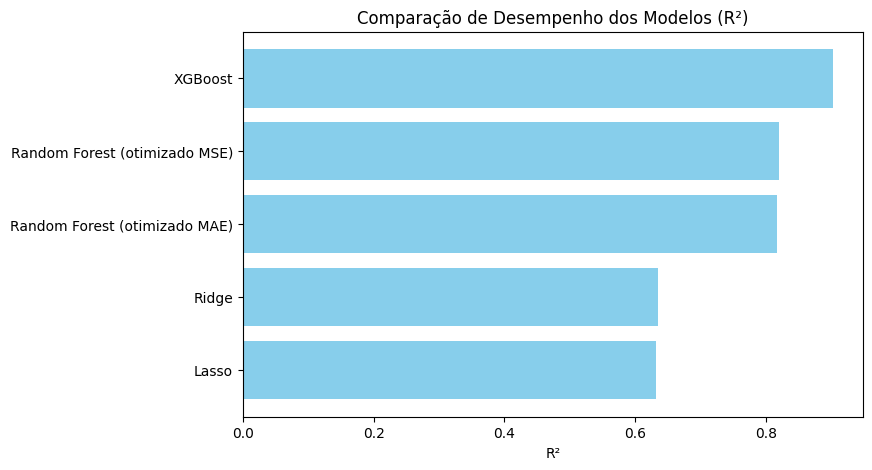

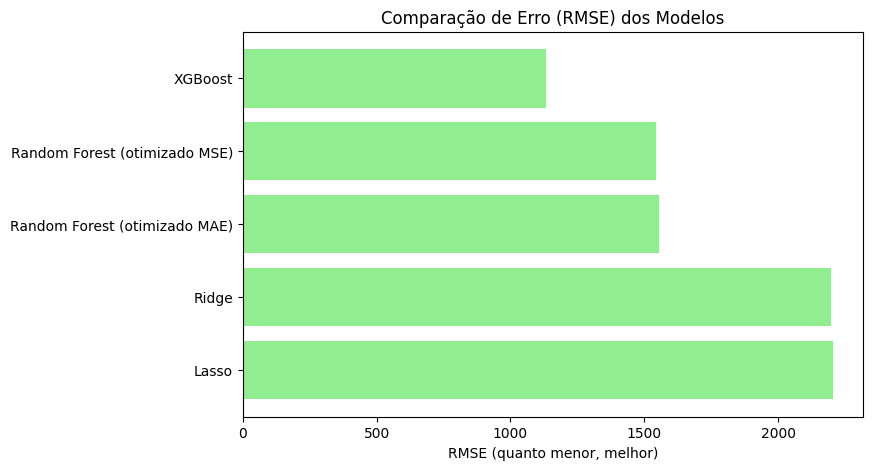

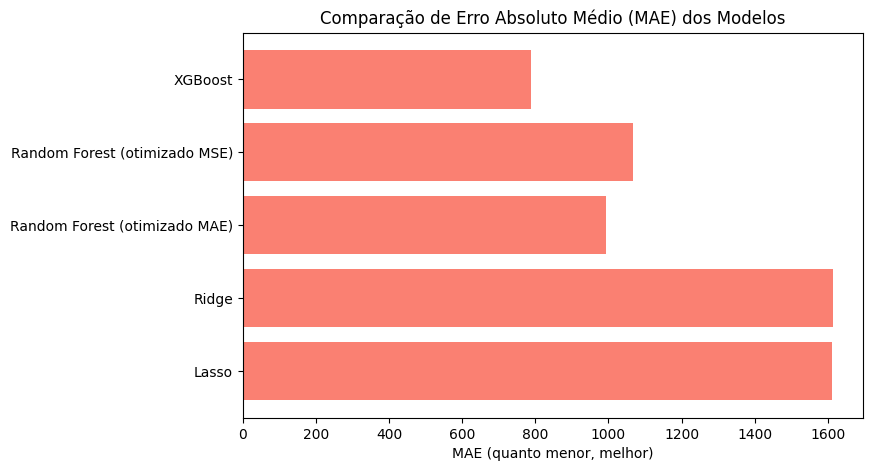

In [19]:
# =====================================================
# COMPARAÇÃO FINAL ENTRE TODOS OS MODELOS + VISUALIZAÇÃO
# =====================================================

# Consolidar resultados
resultados_finais = pd.DataFrame([
    {
        "Modelo": "Ridge",
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "MAE": mae_ridge,
        "R²": r2_ridge
    },
    {
        "Modelo": "Lasso",
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "MAE": mae_lasso,
        "R²": r2_lasso
    },
    {
        "Modelo": "Random Forest (otimizado MSE)",
        "MSE": mse_rf_mse,
        "RMSE": rmse_rf_mse,
        "MAE": mae_rf_mse,
        "R²": r2_rf_mse
    },
    {
        "Modelo": "Random Forest (otimizado MAE)",
        "MSE": mse_rf_mae,
        "RMSE": rmse_rf_mae,
        "MAE": mae_rf_mae,
        "R²": r2_rf_mae
    },
    {
        "Modelo": "XGBoost",
        "MSE": mse_xgb,
        "RMSE": rmse_xgb,
        "MAE": mae_xgb,
        "R²": r2_xgb
    }
])

# Ordenar pelo R² (melhor para pior)
resultados_finais = resultados_finais.sort_values(by="R²", ascending=False).reset_index(drop=True)

print("\n===== COMPARAÇÃO FINAL ENTRE TODOS OS MODELOS =====")
print(resultados_finais)

# =====================================================
# VISUALIZAÇÕES
# =====================================================

# Gráfico R²
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["R²"], color="skyblue")
plt.xlabel("R²")
plt.title("Comparação de Desempenho dos Modelos (R²)")
plt.gca().invert_yaxis()
plt.show()

# Gráfico RMSE
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["RMSE"], color="lightgreen")
plt.xlabel("RMSE (quanto menor, melhor)")
plt.title("Comparação de Erro (RMSE) dos Modelos")
plt.gca().invert_yaxis()
plt.show()

# Gráfico MAE
plt.figure(figsize=(8,5))
plt.barh(resultados_finais["Modelo"], resultados_finais["MAE"], color="salmon")
plt.xlabel("MAE (quanto menor, melhor)")
plt.title("Comparação de Erro Absoluto Médio (MAE) dos Modelos")
plt.gca().invert_yaxis()
plt.show()

# Resultado

Como comentado anteriormente, o resultado do modelo XGBoost foi mais robusto, consistente e com menor erro, capturando melhor as variações nas vendas.

O que vamos fazer agora é utilizar o modelo XGBoost para gerar previsões de vendas futuras, o que de fato é esperado pelo trabalho proosto.

Vamos sair do histórico (treino/teste do Rossmann) e projetar vendas futuras. Para isso, criamos 30 dias de datas após a última observação real do dataset. Nelas, simulamos diferentes cenários de promoções (nenhuma, todas, ou padrão histórico).

A ideia é usar o modelo treinado (XGBoost) para responder:

👉 Como ficariam as vendas nas próximas semanas se adotássemos cada uma dessas estratégias de promoção?

**1. Três cenários simulados**

- Sem Promoções (azul):
O modelo projetou vendas mais baixas e relativamente estáveis. Isso mostra que a promoção tem um impacto significativo no aumento das vendas.

- Com Promoções (todas) (laranja):
Aqui você forçou o modelo a acreditar que todos os dias haverá promoções.
Resultado: as vendas previstas ficaram bem mais altas e também mais regulares.
O comportamento "em degraus" que aparece pode vir de padrões aprendidos no histórico (ex.: promoções frequentes elevam o piso de vendas).

- Promoções Históricas (verde):
Neste cenário, você imitou o padrão típico do dataset (promoções às sextas e sábados).
O gráfico mostra que nos dias com promoção, as vendas sobem bastante (picos), e nos outros dias caem, mas ainda ficam acima do cenário sem promoções.

**2. O que o modelo aprendeu**

- O impacto de promoções é claro: sempre que Promo=1, as vendas sobem.

- O modelo também respeita padrões sazonais semanais: repare nas ondulações cíclicas (picos e vales repetidos semanalmente).

- O fato de o cenário “todas as promoções” ficar acima dos outros indica que o XGBoost capturou bem que promoções são uma das variáveis mais fortes do dataset Rossmann.

**3. Como interpretar para decisão de negócio**

- Se a loja não fizer promoções → vendas tendem a ficar no piso (linha azul).

- Se fizer promoções em todos os dias → a previsão é de um ganho expressivo (linha laranja), mas na prática isso pode reduzir margem de lucro.

- Se fizer promoções em padrão histórico (sextas/sábados) → há picos localizados, reforçando a estratégia de usar promoções em dias de maior movimento (linha verde).

Colunas esperadas pelo modelo: 21 -> ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'CompetitionAgeInMonths', 'Promo2AgeInMonths', 'StateHoliday_0']...
Atenção: existem 1115 stores. Vou prever apenas as primeiras 10. Ajuste max_stores_to_forecast se desejar mais.
Tempo de execução: 5.03 s
Linhas previstas: 900


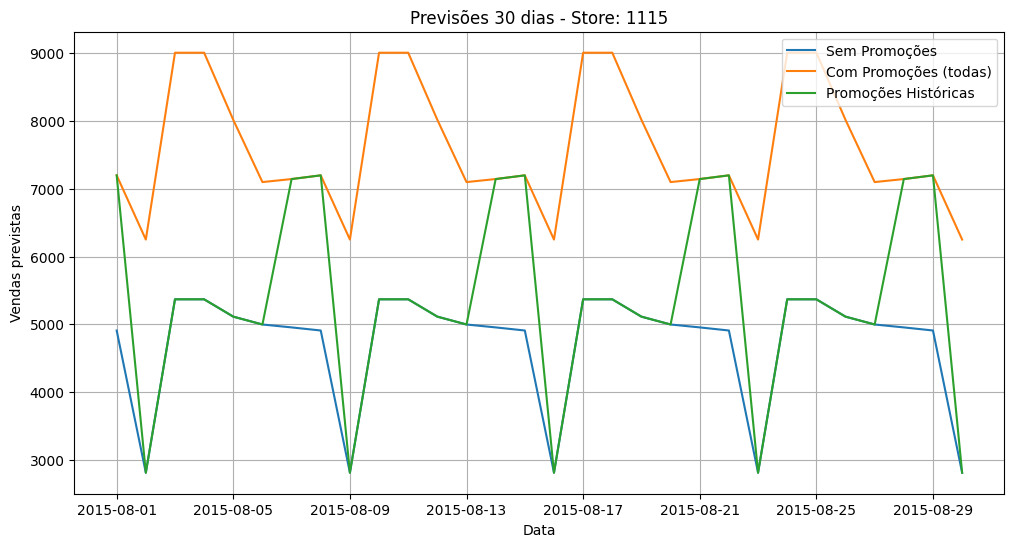

In [20]:
# ==============================
# PREVISÃO 30 DIAS - VERSÃO ROBUSTA
# ==============================

# ---------- checagens iniciais ----------
# Verifica se variáveis essenciais existem
if 'best_xgb' not in globals():
    raise NameError("best_xgb não encontrado. Rode o treinamento e atribua best_xgb = grid_xgb.best_estimator_ antes.")

if 'X_train' not in globals():
    raise NameError("X_train não encontrado. Execute novamente a etapa de split (X_train, y_train).")

# determinar última data usando df_final (se existir) ou X (se contiver Date)
if 'df_final' in globals() and 'Date' in df_final.columns:
    ultimo_dia = df_final['Date'].max()
elif 'Date' in X.columns:
    ultimo_dia = X['Date'].max()
else:
    raise NameError("Nenhuma coluna 'Date' encontrada em df_final nem em X. Garanta que a coluna Date esteja disponível.")

# horizonte
datas_futuras = pd.date_range(start=ultimo_dia + pd.Timedelta(days=1), periods=30, freq="D")

# ---------- cenários (exemplo) ----------
cenarios = {
    "Sem Promoções": pd.DataFrame({"Date": datas_futuras, "Promo": 0}),
    "Com Promoções (todas)": pd.DataFrame({"Date": datas_futuras, "Promo": 1}),
    "Promoções Históricas": pd.DataFrame({"Date": datas_futuras,
                                         "Promo": [1 if d.weekday() in [4,5] else 0 for d in datas_futuras]})
}

# extrair colunas esperadas pelo pipeline
def get_expected_input_columns(pipeline, fallback_X):
    if hasattr(pipeline, "named_steps") and "preprocessor" in pipeline.named_steps:
        pre = pipeline.named_steps["preprocessor"]
        expected = []
        # transformers_ existe após fit, e cada item é (name, transformer, columns)
        for name, transformer, cols in pre.transformers_:
            if cols is None or cols == 'drop':
                continue
            # cols pode ser uma lista de nomes
            expected.extend(list(cols))
        return expected
    else:
        # fallback: usar as colunas do X (assume que X contém as colunas corretas)
        return list(fallback_X.columns)

input_cols = get_expected_input_columns(best_xgb, X_train)
print(f"Colunas esperadas pelo modelo: {len(input_cols)} -> {input_cols[:10]}{'...' if len(input_cols)>10 else ''}")

# ---------- stores a prever (opcional) ----------
# se 'Store' é uma coluna requerida, prevê por cada store; senão prevê só uma vez
if 'Store' in X_train.columns and 'Store' in input_cols:
    unique_stores = X_train['Store'].unique()
else:
    unique_stores = [None]

# limite prudente (ajuste se quiser prever para todos)
max_stores_to_forecast = 10
stores_to_forecast = unique_stores[:max_stores_to_forecast]

if len(unique_stores) > max_stores_to_forecast:
    print(f"Atenção: existem {len(unique_stores)} stores. Vou prever apenas as primeiras {max_stores_to_forecast}. Ajuste max_stores_to_forecast se desejar mais.")

# ---------- criar e preencher df_future para cada store + cenário ----------
df_forecasts = []
start_time = time.time()

for store in stores_to_forecast:
    for nome, df_temp in cenarios.items():
        df_future = df_temp.copy()
        # features temporais que você provavelmente já precisa
        df_future["DayOfWeek"] = df_future["Date"].dt.dayofweek
        df_future["Month"] = df_future["Date"].dt.month
        df_future["Year"] = df_future["Date"].dt.year

        # se 'Store' for necessária, adicionar coluna com id do store atual
        if store is not None and 'Store' in input_cols:
            df_future['Store'] = store

        # Preencher as colunas que faltam com mediana/mode do X_train
        for col in input_cols:
            if col in df_future.columns:
                continue  # já presente
            if col in X_train.columns:
                # distinguir numéricas de categóricas
                if np.issubdtype(X_train[col].dtype, np.number):
                    df_future[col] = X_train[col].median()
                else:
                    # usar a moda; se houver NaN, pegar primeiro valor não-nulo
                    mode_vals = X_train[col].mode()
                    if len(mode_vals) > 0:
                        df_future[col] = mode_vals.iloc[0]
                    else:
                        df_future[col] = X_train[col].dropna().unique()[0] if X_train[col].dropna().size>0 else 0
            else:
                # fallback genérico (0) - ajuste manual se necessário (ex.: Open=1, CompetitionDistance mediana, etc.)
                df_future[col] = 0

        # Garante a ordem/colunas necessárias
        X_future = df_future[input_cols]

        # previsões (o pipeline aplicará pré-processamento automaticamente)
        y_pred = best_xgb.predict(X_future)

        # montar saída
        df_out = pd.DataFrame({
            "Data": df_future["Date"].values,
            "Store": store if store is not None else "all",
            "Cenario": nome,
            "Previsao_Vendas": y_pred
        })
        df_forecasts.append(df_out)

end_time = time.time()
df_forecasts = pd.concat(df_forecasts, ignore_index=True)
print(f"Tempo de execução: {end_time - start_time:.2f} s")
print(f"Linhas previstas: {len(df_forecasts)}")

# ---------- visualização (exemplo: primeiro store previsto) ----------
sample_store = stores_to_forecast[0] if stores_to_forecast[0] is not None else "all"
plt.figure(figsize=(12,6))
for nome in cenarios.keys():
    subset = df_forecasts[(df_forecasts["Cenario"]==nome) & (df_forecasts["Store"]==sample_store)]
    if subset.empty:
        continue
    plt.plot(subset["Data"], subset["Previsao_Vendas"], label=f"{nome}")

plt.title(f"Previsões 30 dias - Store: {sample_store}")
plt.xlabel("Data")
plt.ylabel("Vendas previstas")
plt.legend()
plt.grid(True)
plt.show()